# Nouvelle section

# Nouvelle section

In [ ]:
!pip install --upgrade matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
courses = pd.read_csv("/content/drive/MyDrive/e-learning/courses.csv")
ass = pd.read_csv("/content/drive/MyDrive/e-learning/assessments.csv")
vle = pd.read_csv("/content/drive/MyDrive/e-learning/vle.csv")

In [ ]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [ ]:
studentvle = pd.read_csv("/content/drive/MyDrive/e-learning/studentVle.csv")
studentRegis = pd.read_csv("/content/drive/MyDrive/e-learning/studentRegistration.csv")
studentAss = pd.read_csv("/content/drive/MyDrive/e-learning/studentRegistration.csv")

In [ ]:
studentRegis

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [ ]:
studentvle_detail = pd.merge(left=studentvle, right=vle, left_on=["code_module","code_presentation","id_site"], 
                             right_on=["code_module","code_presentation","id_site"])
studentvle_detail.reset_index(drop=True, inplace=True)
studentvle_detail.drop(["week_from","week_to"], axis=1, inplace=True)
studentvle_detail.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546652,-10,8,forumng
4,AAA,2013J,30268,546652,-10,3,forumng


In [ ]:
studentvle_detail["logs"] = studentvle_detail.groupby(['id_student','date']).cumcount() + 1

In [ ]:
studentvle_detail.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,logs
0,AAA,2013J,28400,546652,-10,4,forumng,1
1,AAA,2013J,28400,546652,-10,1,forumng,2
2,AAA,2013J,28400,546652,-10,1,forumng,3
3,AAA,2013J,28400,546652,-10,8,forumng,4
4,AAA,2013J,30268,546652,-10,3,forumng,1


In [ ]:
activities_ls = {
    "forumng": "active",
    "sharedsubpage": "active", 
    "oucollaborate": "active",
    "questionnaire":"active",
    "resource": "reflective",
    "oucontent": "reflective",
    "quiz": "reflective",
    "glossary": "sensing",
    "ouwiki": "sensing",
    "externalquiz": "sensing",
    "repeatactivity": "sensing",
    "ouelluminate": "verbal",
    "url": "verbal",
    "page":"visual",
    "dataplus":"visual",
    "dualpane":"sequential",
    "subpage": "global",
    "folder":"global",
    "htmlactivity":"uncategorized",
    "homepage": "uncategorized",
}

In [ ]:
studentvle_detail["activity_cat_ls"] = studentvle_detail["activity_type"].map(lambda x: activities_ls[x])
studentvle_detail.drop(studentvle_detail[studentvle_detail["activity_cat_ls"]=="uncategorized"].index, inplace=True)

In [ ]:
studentvle_detail

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,logs,activity_cat_ls
0,AAA,2013J,28400,546652,-10,4,forumng,1,active
1,AAA,2013J,28400,546652,-10,1,forumng,2,active
2,AAA,2013J,28400,546652,-10,1,forumng,3,active
3,AAA,2013J,28400,546652,-10,8,forumng,4,active
4,AAA,2013J,30268,546652,-10,3,forumng,1,active
...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,647054,896969,227,8,oucontent,10,reflective
10655276,GGG,2014J,499187,896969,228,8,oucontent,2,reflective
10655277,GGG,2014J,629258,896969,228,23,oucontent,5,reflective
10655278,GGG,2014J,534672,896969,228,1,oucontent,16,reflective


In [54]:
studentvle_detail[(studentvle_detail["id_student"]== 8462 ) & (studentvle_detail["activity_cat_ls"]== "active")]

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,logs,activity_cat_ls,logs_st_category,SumClick_st,SumClick_st_category,ClickRate_st_category,ClickRate_st_category_intera
4058192,DDD,2013J,8462,674367,-1,5,oucollaborate,3,active,1,5,5,0.200000,High
4058215,DDD,2013J,8462,674367,1,1,oucollaborate,2,active,2,1,6,0.333333,Good
4058324,DDD,2013J,8462,674367,6,1,oucollaborate,7,active,3,1,7,0.428571,Good
4071585,DDD,2013J,8462,673537,-2,4,forumng,4,active,4,4,11,0.363636,Good
4071586,DDD,2013J,8462,673537,-2,4,forumng,5,active,5,8,15,0.333333,Good
4076863,DDD,2013J,8462,673537,4,2,forumng,4,active,6,2,17,0.352941,Good
4076864,DDD,2013J,8462,673537,4,3,forumng,5,active,7,5,20,0.350000,Good
4076865,DDD,2013J,8462,673537,4,1,forumng,6,active,8,6,21,0.380952,Good
4079798,DDD,2013J,8462,673537,6,2,forumng,8,active,9,2,23,0.391304,Good
4081776,DDD,2013J,8462,673537,9,3,forumng,1,active,10,3,26,0.384615,Good


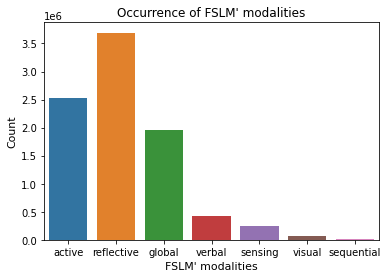

In [ ]:
sns.countplot(x="activity_cat_ls", data=studentvle_detail);

plt.title("Occurrence of FSLM' modalities")
plt.ylabel("Count",fontsize=11);
plt.xlabel("FSLM' modalities",fontsize=11);


In [ ]:
studentvle_detail[studentvle_detail.id_student==58873].iloc[:10]

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,logs,activity_cat_ls
13,AAA,2013J,58873,546652,-10,8,forumng,1,active
14,AAA,2013J,58873,546652,-10,1,forumng,2,active
16,AAA,2013J,58873,546652,-10,5,forumng,3,active
455,AAA,2013J,58873,546652,-9,1,forumng,1,active
1770,AAA,2013J,58873,546652,-2,3,forumng,1,active
1912,AAA,2013J,58873,546652,-1,1,forumng,1,active
3322,AAA,2013J,58873,546652,17,1,forumng,1,active
37151,AAA,2013J,58873,546714,-10,18,oucontent,5,reflective
38447,AAA,2013J,58873,546876,3,5,subpage,2,global
38561,AAA,2013J,58873,546876,5,3,subpage,2,global


In [ ]:
studentvle_detail[(studentvle_detail.id_student==58873) & (studentvle_detail.date==-10)]

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,logs,activity_cat_ls
13,AAA,2013J,58873,546652,-10,8,forumng,1,active
14,AAA,2013J,58873,546652,-10,1,forumng,2,active
16,AAA,2013J,58873,546652,-10,5,forumng,3,active
37151,AAA,2013J,58873,546714,-10,18,oucontent,5,reflective
45975,AAA,2013J,58873,546688,-10,10,oucontent,6,reflective
46652,AAA,2013J,58873,546662,-10,34,oucontent,7,reflective
48223,AAA,2013J,58873,547013,-10,1,resource,8,reflective
52236,AAA,2013J,58873,546879,-10,8,subpage,9,global
62232,AAA,2013J,58873,546667,-10,4,oucontent,10,reflective
64024,AAA,2013J,58873,546681,-10,10,oucontent,11,reflective


In [ ]:
studentvle_detail["logs_st_category"] = studentvle_detail.groupby(["id_student","code_module","code_presentation","activity_cat_ls"]).cumcount()+1

studentvle_detail["SumClick_st"] = studentvle_detail.groupby(["id_student","code_module","code_presentation","date","id_site"])["sum_click"].cumsum()

studentvle_detail["SumClick_st_category"] = studentvle_detail.groupby(["id_student","code_module","code_presentation","activity_cat_ls"])["sum_click"].cumsum()

studentvle_detail["ClickRate_st_category"] = studentvle_detail.apply(lambda x: x["logs_st_category"]/x["SumClick_st_category"], axis=1)


In [ ]:
studentvle_detail["ClickRate_st_category_intera"] = pd.cut(studentvle_detail["ClickRate_st_category"], [-1,0.25,0.5,0.75,1],labels = ["High","Good","Acceptable","Low"])

In [ ]:
studentvle_detail.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,logs,activity_cat_ls,logs_st_category,SumClick_st,SumClick_st_category,ClickRate_st_category,ClickRate_st_category_intera
0,AAA,2013J,28400,546652,-10,4,forumng,1,active,1,4,4,0.250000,High
1,AAA,2013J,28400,546652,-10,1,forumng,2,active,2,5,5,0.400000,Good
2,AAA,2013J,28400,546652,-10,1,forumng,3,active,3,6,6,0.500000,Good
3,AAA,2013J,28400,546652,-10,8,forumng,4,active,4,14,14,0.285714,Good
4,AAA,2013J,30268,546652,-10,3,forumng,1,active,1,3,3,0.333333,Good


In [ ]:
path = '/content/drive/My Drive/output.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  studentvle_detail.to_csv(f)

In [ ]:
data2 = studentvle_detail[studentvle_detail["id_student"]==8462]

In [ ]:
data2.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,logs,activity_cat_ls,logs_st_category,SumClick_st,SumClick_st_category,ClickRate_st_category,ClickRate_st_category_intera
3665334,DDD,2013J,8462,673740,0,4,oucontent,1,reflective,1,4,4,0.250000,High
3671870,DDD,2013J,8462,673740,28,1,oucontent,1,reflective,2,1,5,0.400000,Good
3674820,DDD,2013J,8462,674158,-1,1,subpage,1,global,1,1,1,1.000000,Low
3674982,DDD,2013J,8462,674158,0,2,subpage,2,global,2,2,3,0.666667,Acceptable
3677360,DDD,2013J,8462,674158,21,1,subpage,1,global,3,1,4,0.750000,Acceptable


In [ ]:
data_a = data2[data2.activity_cat_ls=="active"]
data_r = data2[data2.activity_cat_ls=="reflective"]
data_g = data2[data2.activity_cat_ls=="global"]
data_v = data2[data2.activity_cat_ls=="verbal"]

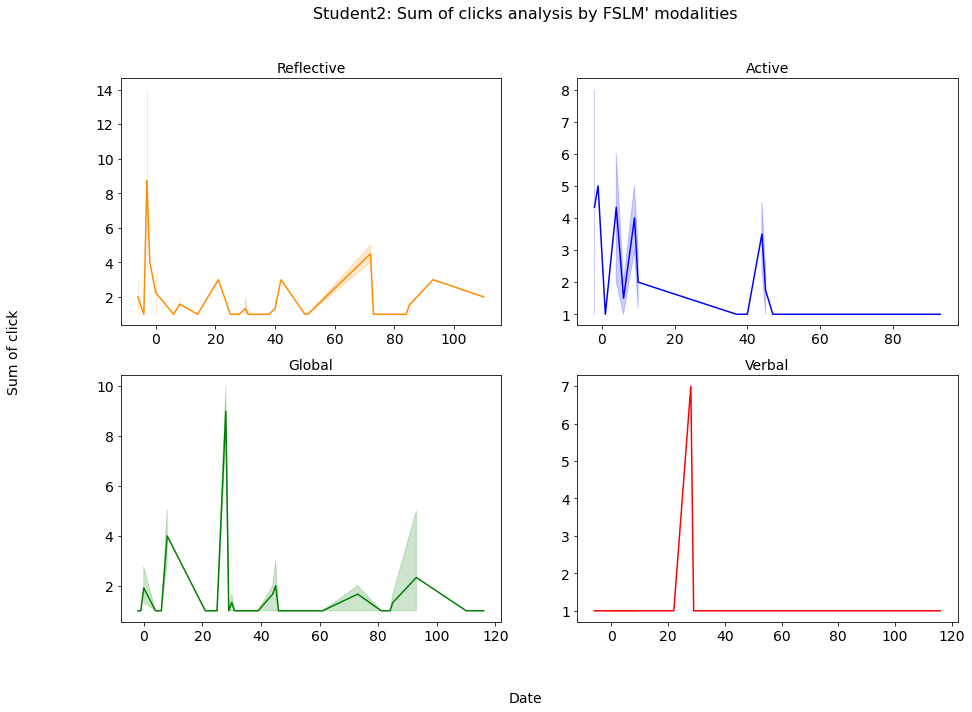

In [ ]:
fig = plt.figure(figsize=(15,10));
plt.suptitle("Student2: Sum of clicks analysis by FSLM' modalities",fontsize=16);
palette={"active":"blue","reflective":"darkorange","global":"green", "verbal":"r","sensing":"mediumpurple","visual":"brown","sequential":"c"}

fig.supxlabel("Date",fontsize=14)
fig.supylabel('Sum of click',fontsize=14)

plt.subplot(2,2,1)
ax = sns.lineplot(data=data_r, x="date", y="SumClick_st",color="darkorange");
plt.title("Reflective",fontsize=14)
plt.ylabel("");
plt.xlabel("");
ax.tick_params(axis='both', labelsize=14)


plt.subplot(2,2,2)
ax = sns.lineplot(data=data_a, x="date", y="SumClick_st",color="blue");
plt.title("Active",fontsize=14)
plt.ylabel("");
plt.xlabel("");
ax.tick_params(axis='both', labelsize=14)


plt.subplot(2,2,3)
ax = sns.lineplot(data=data_g, x="date", y="SumClick_st",color="green");
plt.title("Global",fontsize=14)
plt.ylabel("");
plt.xlabel("");
ax.tick_params(axis='both', labelsize=14)


plt.subplot(2,2,4)
ax = sns.lineplot(data=data_v, x="date", y="SumClick_st",color="red");
plt.title("Verbal",fontsize=14)
plt.ylabel("");
plt.xlabel("");
ax.tick_params(axis='both', labelsize=14)

#plt.savefig("image-LS/student2_sum_click.png",dpi=300)
#plt.savefig("image-LS/student2_sum_click.eps", bbox_inches = 'tight', format="eps")